m*x'' + gamma*x' +      k*x = F(t)
  x'' +     g*x' + omega0*x = f(t)

first order system
i)  x' = f1(t,x,v) = v
ii) v' = f2(t,x,v) = f(t) - g*v - omega0*x

In [1]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

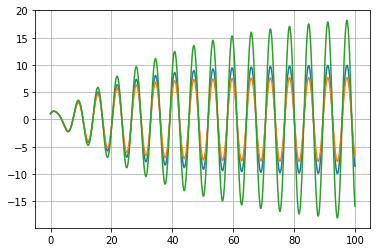

In [2]:
dt   = 0.05
x0   = 1
v0   = 1
t0   = 0

#Runge-Kutta45
def extForce(t,Fmax,extFreq):
    return Fmax*np.sin(extFreq*t)

def fA1(x,v,t):
    return v

def fA2(x,v,t,m,gamma,k,Fmax,extFreq):
    return (extForce(t,Fmax,extFreq) - gamma*v - k*x)/m

def rungeKuttaStep(x,v,t,m,gamma,k,Fmax,extFreq):
    k11 = dt*fA1(x,v,t)
    k21 = dt*fA2(x,v,t,m,gamma,k,Fmax,extFreq)
    k12 = dt*fA1(x+0.5*k11,v+0.5*k21,t+0.5*dt)
    k22 = dt*fA2(x+0.5*k11,v+0.5*k21,t+0.5*dt,m,gamma,k,Fmax,extFreq)
    k13 = dt*fA1(x+0.5*k12,v+0.5*k22,t+0.5*dt)
    k23 = dt*fA2(x+0.5*k12,v+0.5*k22,t+0.5*dt,m,gamma,k,Fmax,extFreq)
    k14 = dt*fA1(x+k13,v+k23,t+dt)
    k24 = dt*fA2(x+k13,v+k23,t+dt,m,gamma,k,Fmax,extFreq)
    x  += (k11+2*k12+2*k13+k14)/6
    v  += (k21+2*k22+2*k23+k24)/6
    return x, v
    
def rungeKuttaIntegration(x,v,t0,m,gamma,k,Fmax,extFreq,steps):
    T = []
    X = []
    V = []
    for i in range(steps):
        t = t0+i*dt 
        x,v = rungeKuttaStep(x,v,t,m,gamma,k,Fmax,extFreq)
        T.append(t)
        X.append(x)
        V.append(v)
        #print(t,x,v)
    return T,X,V

T,X,V = rungeKuttaIntegration(x0,v0,t0,1.0,0.10,1.0,1.0,1.0,2000)
plt.plot(T,X)
T,X,V = rungeKuttaIntegration(x0,v0,t0,1.0,0.13,1.0,1.0,1.0,2000)
plt.plot(T,X)
T,X,V = rungeKuttaIntegration(x0,v0,t0,1.0,0.05,1.0,1.0,1.0,2000)
plt.plot(T,X)
plt.grid(True)

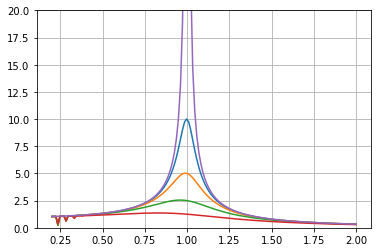

In [3]:
m       = 1.0
gamma   = 0.1
k       = 1.0
Fmax    = 1.0

def getResonance(x0,v0,t0,m,gamma,k,Fmax,steps):
    eF  = []
    amp = []
    for extFreq in np.linspace(0.2*np.sqrt(k/m), 2.0*np.sqrt(k/m), 150):
        T,X,V = rungeKuttaIntegration(x0,v0,t0,m,gamma,k,Fmax,extFreq,steps)
        amplitude = np.max(X[-300:])
        eF.append(extFreq)
        amp.append(amplitude)
    return eF, amp

eF,amp = getResonance(x0,v0,t0,m,  gamma,k,Fmax,8000)
plt.plot(eF,amp)
eF,amp = getResonance(x0,v0,t0,m,2*gamma,k,Fmax,8000)
plt.plot(eF,amp)
eF,amp = getResonance(x0,v0,t0,m,4*gamma,k,Fmax,8000)
plt.plot(eF,amp)
eF,amp = getResonance(x0,v0,t0,m,8*gamma,k,Fmax,8000)
plt.plot(eF,amp)
plt.plot(eF,np.abs(Fmax/(-m*np.power(eF,2)+k)))  #via inserting x(t)=x0*cos(extF*t) into Dgl assuming gamma=0
plt.ylim((0,20))
plt.grid(True)

### Phase space gymnastics

In [14]:
m  = 1

def calcPotential(x):
    potential = x**6 +4*x**3 -5*x**2 -4*x
    return potential

def fB1(x,v,t):
    return v

def fB2(x,v,t,m):
    eps=0.001
    f = -(calcPotential(x+eps)-calcPotential(x-eps))/(2*eps)
    return f/m

def rungeKuttaStep(x,v,t,m):
    k11 = dt*fB1(x,v,t)
    k21 = dt*fB2(x,v,t,m)
    k12 = dt*fB1(x+0.5*k11,v+0.5*k21,t+0.5*dt)
    k22 = dt*fB2(x+0.5*k11,v+0.5*k21,t+0.5*dt,m)
    k13 = dt*fB1(x+0.5*k12,v+0.5*k22,t+0.5*dt)
    k23 = dt*fB2(x+0.5*k12,v+0.5*k22,t+0.5*dt,m)
    k14 = dt*fB1(x+k13,v+k23,t+dt)
    k24 = dt*fB2(x+k13,v+k23,t+dt,m)
    x  += (k11+2*k12+2*k13+k14)/6
    v  += (k21+2*k22+2*k23+k24)/6
    return x, v
    
def rungeKuttaIntegration(x,v,t0,m,steps):
    T = []
    X = []
    V = []
    for i in range(steps):
        t = t0+i*dt 
        x,v = rungeKuttaStep(x,v,t,m)
        T.append(t)
        X.append(x)
        V.append(v)
        #print(t,x,v)
    return np.array(T),np.array(X),np.array(V)

dt = 0.01
maxSteps = 20001
t0 = 0
nx = 35
nv = 35
TXV = np.array([[rungeKuttaIntegration(x0,v0,t0,m,maxSteps) for x0 in np.linspace(0,0.5,nx) ] for v0 in np.linspace(-0.5,0.5,nv)])
TXV = TXV.reshape(nx*nv,3,maxSteps)

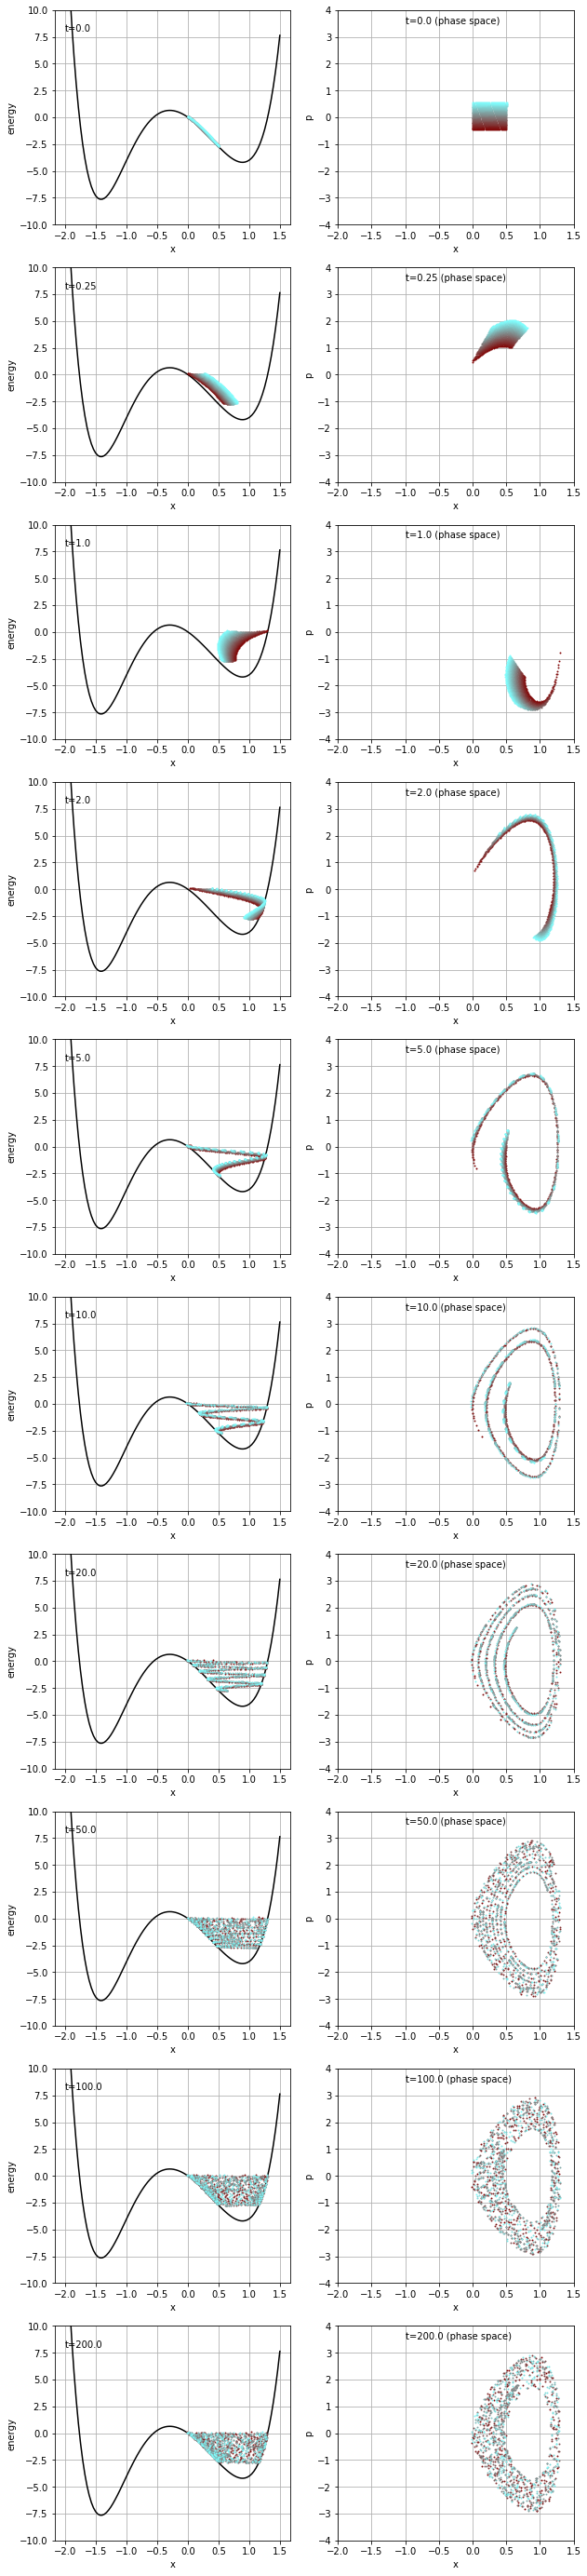

In [24]:
xPoints = np.linspace(-2,1.5,100)
steps = [0,25,100,200,500,1000,2000,5000,10000,20000]#np.arange(0,250,25)

fig,ax = plt.subplots(len(steps),2,figsize=(10,len(steps)*5))
for i, step in enumerate(steps):
    ax[i,0].plot(xPoints,calcPotential(xPoints),color='black')
    for k in range(nx*nv):
        ax[i,0].plot(TXV[k][1][step],0.5*m*TXV[k][2][step]**2+calcPotential(TXV[k][1][step]),marker='.',markersize=1.9,color=[0.5,k/(nx*nv),k/(nx*nv)])
    ax[i,0].set_ylim(-10,10)
    ax[i,0].grid(True)
    ax[i,0].text(-2,8,'t='+str(step*dt))
    ax[i,0].set_xlabel('x')
    ax[i,0].set_ylabel('energy')

    for k in range(nx*nv):
        ax[i,1].plot(TXV[k][1][step],m*TXV[k][2][step],marker='.',markersize=1.9,color=[0.5,k/(nx*nv),k/(nx*nv)])
    ax[i,1].set_xlim(-2,1.5)
    ax[i,1].set_ylim(-4,4)
    ax[i,1].grid(True)
    ax[i,1].text(-1,3.5,'t='+str(step*dt)+' (phase space)')
    ax[i,1].set_xlabel('x')
    ax[i,1].set_ylabel('p')